## 1.0 Import Libraries 

In [4]:
import sqlite3
import pandas as pd
import math
from scipy import stats
import seaborn as sns
import numpy as np

## 1.1 Import Data

In [8]:
connection = sqlite3.connect('Northwind_small.sqlite')
cursor = connection.cursor()

def sql_select_to_df(SQL_COMMAND, cursor=cursor):
    results = cursor.execute(SQL_COMMAND).fetchall()
    df = pd.DataFrame(results)
    df.columns = [i[0] for i in cursor.description]
    return df

orderDetail_df = sql_select_to_df("""select * from OrderDetail;""")

## 1 Identified unique discount rates

In [9]:
non_discounted_df = orderDetail_df.loc[orderDetail_df['Discount'] == 0]
discounted_df = orderDetail_df.loc[orderDetail_df['Discount'] != 0]

#mean_quantity_non_discounted = non_discounted_df['Quantity'].mean()

In [10]:
#Get different discount levels

discount_rates = discounted_df['Discount'].unique()
discount_rates = list(discount_rates)
discount_rates.sort()

print(discount_rates)

discount_rate1 = discount_rates[0]
discount_rate2 = discount_rates[1]
discount_rate3 = discount_rates[2]
discount_rate4 = discount_rates[3]
discount_rate5 = discount_rates[4]
discount_rate6 = discount_rates[5]
discount_rate7 = discount_rates[6]
discount_rate8 = discount_rates[7]
discount_rate9 = discount_rates[8]
discount_rate10 = discount_rates[9]

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]


## 1.3 Get Number of Products for Each Subset

In [11]:
discount_rate1_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[0]]
discount_rate1_vals = discount_rate1_df['Quantity'].values
discount_rate1_sample_size = len(discount_rate1_vals)

discount_rate2_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[1]]
discount_rate2_vals = discount_rate2_df['Quantity'].values
discount_rate2_sample_size = len(discount_rate2_vals)

discount_rate3_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[2]]
discount_rate3_vals = discount_rate3_df['Quantity'].values
discount_rate3_sample_size = len(discount_rate3_vals)

discount_rate4_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[3]]
discount_rate4_vals = discount_rate4_df['Quantity'].values
discount_rate4_sample_size = len(discount_rate4_vals)

discount_rate5_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[4]]
discount_rate5_vals = discount_rate5_df['Quantity'].values
discount_rate5_sample_size = len(discount_rate5_vals)

discount_rate6_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[5]]
discount_rate6_vals = discount_rate6_df['Quantity'].values
discount_rate6_sample_size = len(discount_rate6_vals)

discount_rate7_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[6]]
discount_rate7_vals = discount_rate7_df['Quantity'].values
discount_rate7_sample_size = len(discount_rate7_vals)

discount_rate8_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[7]]
discount_rate8_vals = discount_rate8_df['Quantity'].values
discount_rate8_sample_size = len(discount_rate8_vals)

discount_rate9_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[8]]
discount_rate9_vals = discount_rate9_df['Quantity'].values
discount_rate9_sample_size = len(discount_rate9_vals)

discount_rate10_df = orderDetail_df.loc[orderDetail_df['Discount'] == discount_rates[9]]
discount_rate10_vals = discount_rate10_df['Quantity'].values
discount_rate10_sample_size = len(discount_rate10_vals)

/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/james/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/james/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/james/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[ 35  15   6  15  40  25  15  21  50  65   6  16  15  21  12  60  60  36
  25  12  70  15  60  20  24  15  60  33  12   6  15  15  20   5  45  40
  36  40  15  10   3  20  24   2  40  30  40  30  15  25  25  30  40  30
  25  21  70  40  80  25  50  35  30  10   8  20  12  50  25  40  10  16
  10  40   7  25   6  48  18  70  20  12  40   9  24  56  40  40   4  70
  36  50   6  15  15  18  20  77  10  20  12  50  30   8  10  10  20  56
  70  80  54  55   5  13  35  18  15  20   6  12  40  70  42  80  50  42
  20  20   8  16  20  18  20   6  10  20   8  15  20  60  40  24  25  42
   7  70  28  70  10  18 120  21  70  30  40  30  30  42   5   2  25  40
   9  20  18   2  36  60  20  20   2   8  20   4  15  10  60  49  30  10
  20  35  45  70  50  50  30  18  40  30  24  15  20  15  45  49  24  90
   6  12  20   3  15  20   6 120  35  28  55 100  15  25  20  20  10  40
  21  16  20  21   4  40  28  60  16  30  18  30  40  35   2  80  35  60
  42   2  21  20  20  35  30  20  20  30  60  24  2

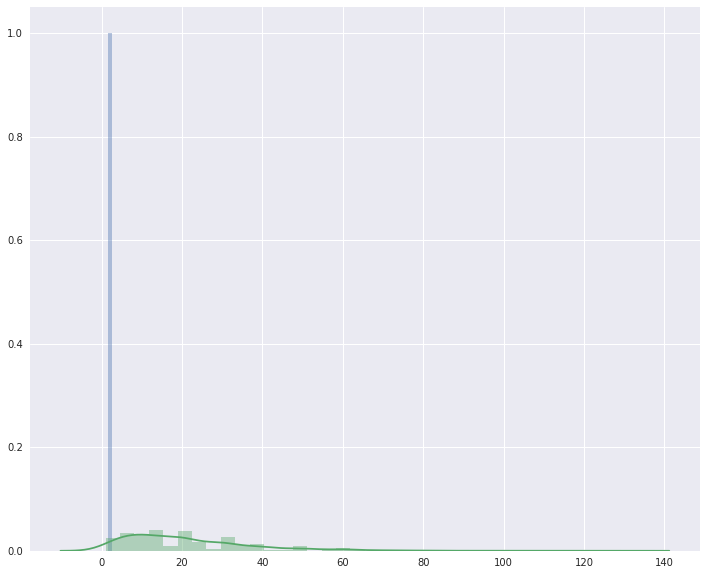

In [12]:
discounted = discounted_df['Quantity'].values
non_discounted = non_discounted_df['Quantity'].values

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(discount_rate1_vals) # Blue distribution
sns.distplot(non_discounted) # Green distribution

print(discounted)

### Null Hypothesis

Discounts have no statistically significant effect on the number of products customers order.

### Alternate Hypothesis

Discounts have a statistically significant effect on the number of products customers order.

In [ ]:
discounted.mean()
non_discounted.mean()
discounted.mean() - non_discounted.mean()

$$ t = \frac{\bar{x}{1} - \bar{x}{2}}{\sqrt{s^{2} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) } } $$


$$ s^{2} = \frac{\sum_{i=1}^{n_{1}}(x_{i} - \bar{x}{1})^{2} + \sum{j=1}^{n_{2}}(x_{j} - \bar{x}{2})^{2} } {n{1} + n_{2} -2} $$

In [ ]:
def variance(sample):
    sample_mean = np.mean(sample)
    return sum([(i - sample_mean)**2 for i in sample])

def sample_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = variance(sample1), variance(sample2)
    return (var_1 + var_2)/((n_1 + n_2)-2)

def twosample_tstatistic(disc, non_disc):
    disc_mean, non_disc_mean = np.mean(disc), np.mean(non_disc)
    samp_var = sample_variance(disc, non_disc)
    n_d, n_n = len(disc), len(non_disc)
    num = disc_mean - non_disc_mean
    denom = np.sqrt(samp_var * ((1/n_d)+(1/n_n)))
    return num / denom

def get_sample_sizes(disc, non_disc):
    n_1, n_2 = len(disc), len(non_disc)
    print(n_1, n_2)
    
def get_null_hypothesis_outcome(alpha,p):
    if p < alpha:
        return 'reject null hypothesis'
    else:
        return 'fail to reject null hypothesis'
    
def pass_terms_to_dict(sample_size, disc_rate, t_stat, p, outcome):
    return {'sample size':sample_size, 'discount rate': disc_rate, 't_stat': t_stat, 'p': p, 'outcome': outcome}

In [ ]:
t_stat1 = twosample_tstatistic(discount_rate1_vals, non_discounted)
t_stat2 = twosample_tstatistic(discount_rate2_vals, non_discounted)
t_stat3 = twosample_tstatistic(discount_rate3_vals, non_discounted)
t_stat4 = twosample_tstatistic(discount_rate4_vals, non_discounted)
t_stat5 = twosample_tstatistic(discount_rate5_vals, non_discounted)
t_stat6 = twosample_tstatistic(discount_rate6_vals, non_discounted)
t_stat7 = twosample_tstatistic(discount_rate7_vals, non_discounted)
t_stat8 = twosample_tstatistic(discount_rate8_vals, non_discounted)
t_stat9 = twosample_tstatistic(discount_rate9_vals, non_discounted)
t_stat10 = twosample_tstatistic(discount_rate9_vals, non_discounted)

#print(t_stat1, t_stat2, t_stat3, t_stat4, t_stat5, t_stat6, t_stat7, t_stat8, t_stat9, t_stat10)

In [ ]:
alpha = 0.05

p1 = stats.t.sf(abs(t_stat1), len(discounted)+len(non_discounted)-1) * 2
p2 = stats.t.sf(abs(t_stat2), len(discounted)+len(non_discounted)-1) * 2
p3 = stats.t.sf(abs(t_stat3), len(discounted)+len(non_discounted)-1) * 2
p4 = stats.t.sf(abs(t_stat4), len(discounted)+len(non_discounted)-1) * 2
p5 = stats.t.sf(abs(t_stat5), len(discounted)+len(non_discounted)-1) * 2
p6 = stats.t.sf(abs(t_stat6), len(discounted)+len(non_discounted)-1) * 2
p7 = stats.t.sf(abs(t_stat7), len(discounted)+len(non_discounted)-1) * 2
p8 = stats.t.sf(abs(t_stat8), len(discounted)+len(non_discounted)-1) * 2
p9 = stats.t.sf(abs(t_stat9), len(discounted)+len(non_discounted)-1) * 2
p10 = stats.t.sf(abs(t_stat10), len(discounted)+len(non_discounted)-1) * 2

#print(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10)

In [ ]:
test_outcome1 = get_null_hypothesis_outcome(alpha,p1)
test_outcome2 = get_null_hypothesis_outcome(alpha,p2)
test_outcome3 = get_null_hypothesis_outcome(alpha,p3)
test_outcome4 = get_null_hypothesis_outcome(alpha,p4)
test_outcome5 = get_null_hypothesis_outcome(alpha,p5)
test_outcome6 = get_null_hypothesis_outcome(alpha,p6)
test_outcome7 = get_null_hypothesis_outcome(alpha,p7)
test_outcome8 = get_null_hypothesis_outcome(alpha,p8)
test_outcome9 = get_null_hypothesis_outcome(alpha,p9)
test_outcome10 = get_null_hypothesis_outcome(alpha,p10)

#print(test_outcome1)
#print(test_outcome2)
#print(test_outcome3)
#print(test_outcome4)
#print(test_outcome5)
#print(test_outcome6)
#print(test_outcome7)
#print(test_outcome8)
#print(test_outcome9)
#print(test_outcome10)

There is a 1.14e-10% chance that the difference in means we're seeing is due to randomness or pure luck. Because this chance falls under the 5% we pre-determined from our 95% confidence interval, we can accept the alternate hypothesis that discounts have a statistically significant effect on the number of products customers order.

### Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

In [ ]:
discounted_df

In [ ]:
#Get different discount levels

discount_rates = discounted_df['Discount'].unique()
discount_rates = list(discount_rates)
discount_rates.sort()

discount_rates

In [ ]:
dict1 = pass_terms_to_dict(discount_rate1_sample_size, discount_rate1, t_stat1, p1, test_outcome1)
dict2 = pass_terms_to_dict(discount_rate2_sample_size, discount_rate2, t_stat2, p2, test_outcome2)
dict3 = pass_terms_to_dict(discount_rate3_sample_size, discount_rate3, t_stat3, p3, test_outcome3)
dict4 = pass_terms_to_dict(discount_rate4_sample_size, discount_rate4, t_stat4, p4, test_outcome4)
dict5 = pass_terms_to_dict(discount_rate5_sample_size, discount_rate5, t_stat5, p5, test_outcome5)
dict6 = pass_terms_to_dict(discount_rate6_sample_size, discount_rate6, t_stat6, p6, test_outcome6)
dict7 = pass_terms_to_dict(discount_rate7_sample_size, discount_rate7, t_stat7, p7, test_outcome7)
dict8 = pass_terms_to_dict(discount_rate8_sample_size, discount_rate8, t_stat8, p8, test_outcome8)
dict9 = pass_terms_to_dict(discount_rate9_sample_size, discount_rate9, t_stat9, p9, test_outcome9)

print(dict1)
print(dict2)
print(dict3)
print(dict4)
print(dict5)
print(dict6)
print(dict7)
print(dict8)
print(dict9)

### What Levels of Discount Have a Statistically Significant Effect on the Amount of Products Customers Order?

- 0.03
- 0.05
- 0.1
- 0.15
- 0.2